## steps to build an ML Model
	1.import Dataset
	2.Visualize the dataset
	3.data Preparation
	4.Training the algorithm
	5.Making Prediction
	6.Model Evaluation

## 1. Importing LIbraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
print("THe no of Columns are ",data.shape[0])
print("The no of Rows are", data.shape[1])

THe no of Columns are  150
The no of Rows are 5


In [7]:
data.shape

(150, 5)

In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data_dup = data.duplicated().any()
data_dup

True

In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(147, 5)

In [13]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:

grouped_data = data.groupby('species')  


In [15]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 2.Visualise the Dataset

In [17]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

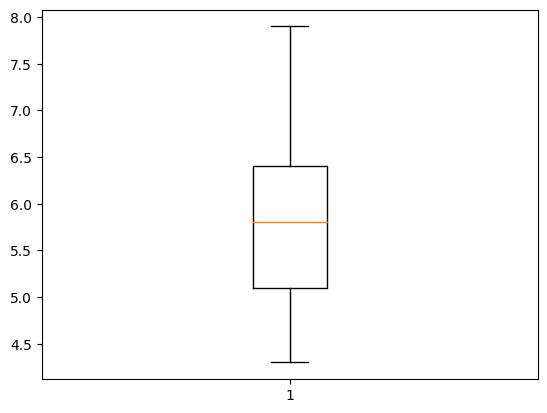

In [18]:
plt.boxplot(data['sepal_length']);

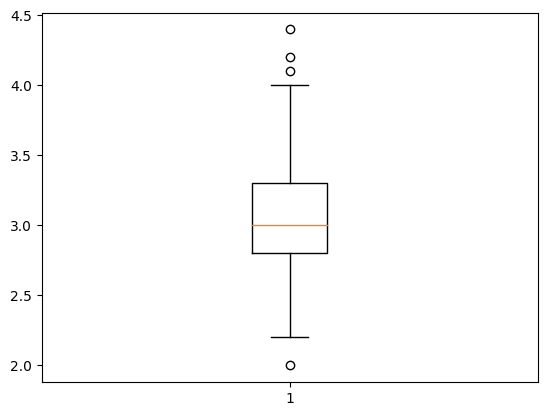

In [19]:
plt.boxplot(data['sepal_width']);

In [20]:
print("There is a outlier in Seapal_width")

There is a outlier in Seapal_width


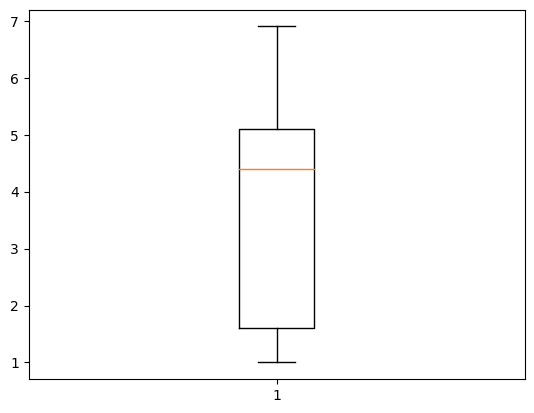

In [21]:
plt.boxplot(data["petal_length"]);

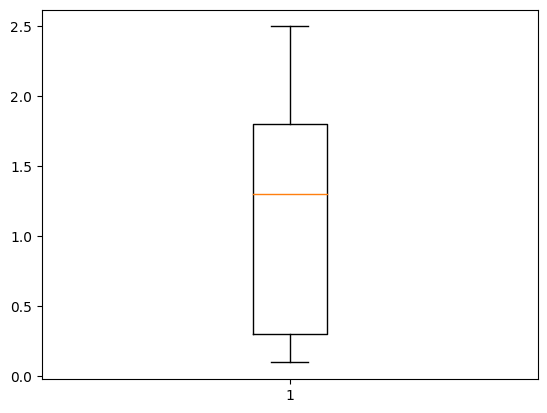

In [22]:
plt.boxplot(data['petal_width']);

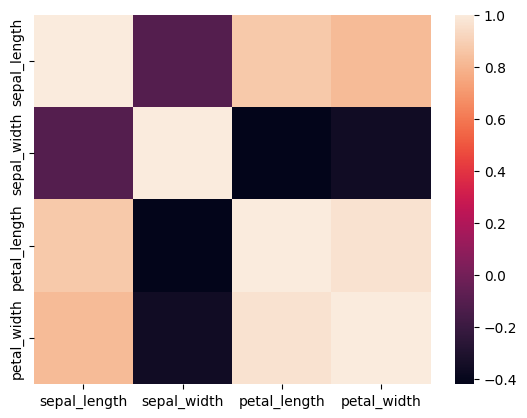

In [23]:
sns.heatmap(data.corr(numeric_only=True));


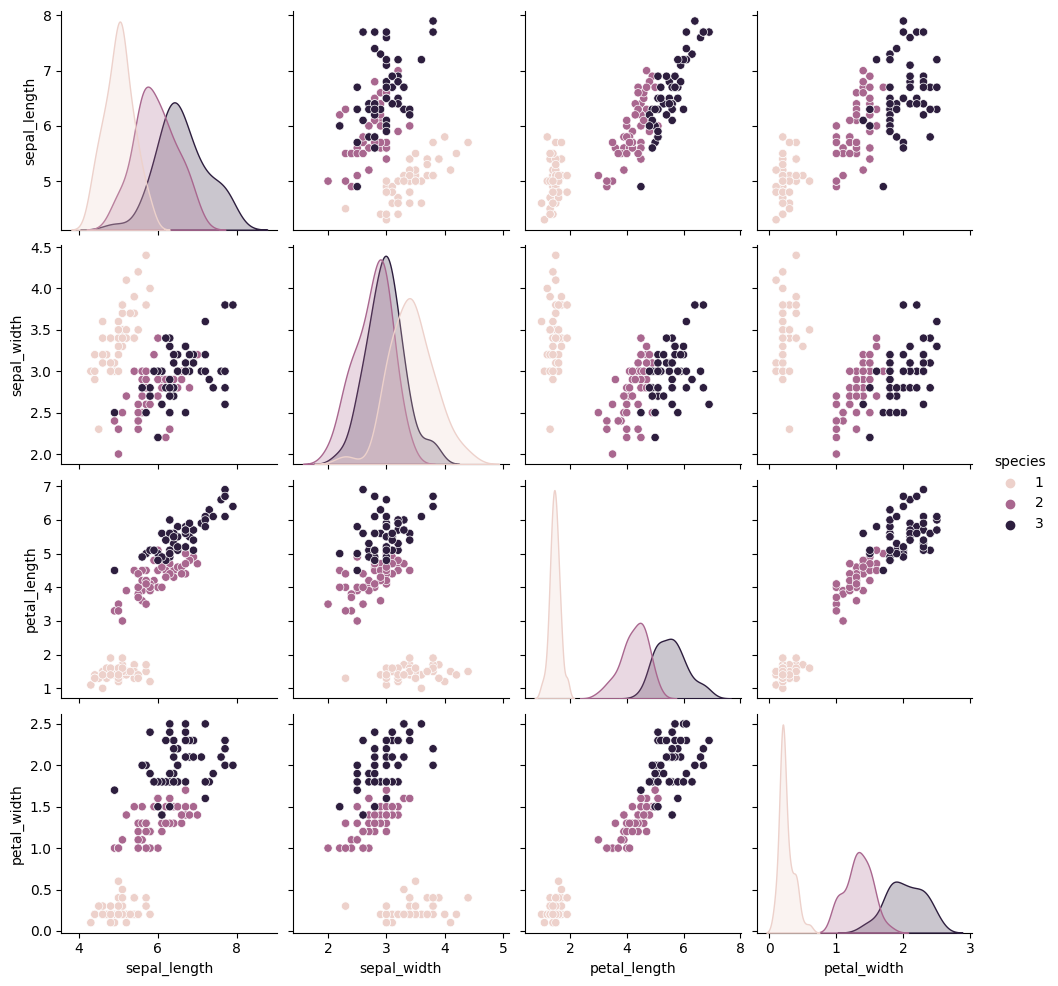

In [66]:
# Visualize the whole dataset
sns.pairplot(data, hue='species');

## 3.Data Preparation

In [35]:
sp={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}


In [36]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [37]:
X=data.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
y=data.iloc[:,4]
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 147, dtype: int64

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

## Training the model

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
model = LogisticRegression()

In [55]:
model.fit(X,y);

In [50]:
model.score(X,y) #coef of prediction

0.9727891156462585

In [49]:
model.coef_

array([[-0.42197227,  0.96453084, -2.50471122, -1.07100712],
       [ 0.51657796, -0.32799816, -0.20176375, -0.93666262],
       [-0.09460569, -0.63653268,  2.70647497,  2.00766974]])

In [51]:
model.intercept_

array([  9.79013004,   2.33169486, -12.1218249 ])

## Making Prediction

In [56]:
y_pred=model.predict(X_test)
y_pred

array([3, 2, 3, 1, 2, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 2, 3, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 2, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 2, 3,
       2, 2, 3, 3, 1], dtype=int64)

## Model Evaluation

In [59]:
# Calculate the mean squared error
mse = np.mean((y_pred - y_test) ** 2)

# Print the mean squared error
print("Mean squared error: %.2f" % mse)

Mean squared error: 0.04
